# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway

from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

# 1.0 Conhecendo os Dados

## 1.1 Primeiras Linhas

In [2]:
df_raw = pd.read_csv(r"C:/users/leovi/CursoDS/Pratica/datasets/marketing_campaign.csv", sep=None)

In [3]:
df_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Dimensões

In [4]:
print("Número de Linhas:", df_raw.shape[0])
print("Número de Colunas:", df_raw.shape[1])

Número de Linhas: 2240
Número de Colunas: 29


## 1.2 Integridade dos Dados

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Existem 24 valores nulos na coluna "Income". Para lidar com estes valores optei por preenchê-los com a média.

In [6]:
df_raw.Income = df_raw.Income.fillna(df_raw.Income.mean())

A variável Dt_customer que indica desde quando o ciente é cliente, está com seu tipo como object, irei transformar para datetime.

In [7]:
df_raw["Dt_Customer"] = pd.to_datetime(df_raw["Dt_Customer"])

## 1.3 Estatísticas Descritivas

### Variáveis Numéricas

In [8]:
df_raw.describe().round(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,...,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,...,5.32,0.07,0.07,0.07,0.06,0.01,0.01,3.0,11.0,0.15
std,3246.66,11.98,25037.80,0.54,0.54,28.96,336.60,39.77,225.72,54.63,...,2.43,0.26,0.26,0.26,0.25,0.11,0.10,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
25%,2828.25,1959.00,35538.75,0.00,0.00,24.00,23.75,1.00,16.00,3.00,...,3.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
50%,5458.50,1970.00,51741.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,...,6.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
75%,8427.75,1977.00,68289.75,1.00,1.00,74.00,504.25,33.00,232.00,50.00,...,7.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,20.00,1.00,1.00,1.00,1.00,1.00,1.00,3.0,11.0,1.00


### Variáveis Categóricas

In [9]:
categorias = ["Education", "Marital_Status", "Complain"]

for i in categorias:
    print(i, ":\n")
    print(df_raw[i].value_counts())
    print("\n\n")

Education :

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64



Marital_Status :

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



Complain :

0    2219
1      21
Name: Complain, dtype: int64





## 1.4 Engenharia de Variáveis

A fim a deixarmos a análise mais consistente, iremos criar algumas variáveis baseadas nas que já temos, além de corrigir alguns erros de entrada.

In [10]:
# Criando uma cópia para trabalharmos em cima

df = df_raw.copy()

In [11]:
# Removendo um outlier extremo visto em Income

df.drop(df[df["Income"]==666666.00].index, axis = 0, inplace = True)

In [12]:
# Total gasto pelo cliente

df["total_gasto"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + \
df["MntSweetProducts"] + df["MntGoldProds"]

In [13]:
# Idade

df["idade"] = 2015 - df["Year_Birth"]

In [14]:
# Número total de compras

df["total_compras"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

In [15]:
# Existem clientes que nunca compraram nada, iremos remove-los

df.drop(df[df["total_compras"]==0].index, axis = 0, inplace = True)

In [16]:
# Tempo como cliente em meses

data_atual = pd.to_datetime(datetime.strptime('2015-01-01', '%Y-%m-%d').date())

df["meses_como_cliente"] = round((data_atual - df.Dt_Customer)/np.timedelta64(1, 'M'))

In [17]:
# Gasto médio por compra

df["gasto_medio"] = df["total_gasto"] / df["total_compras"]

In [18]:
# Total Filhos e filhos

df["total_filhos"] = df["Kidhome"] + df["Teenhome"]

df["filhos"] = np.where(df["total_filhos"] > 0, "sim", "nao")

In [19]:
# Corrigindo valores sem sentido em "Marital_Status"

df["Marital_Status"] = df["Marital_Status"].replace({"Married":"in_couple", "Together":"in_couple", "Single":"single", 
                                                     "Divorced":"single", "Widow":"single", "Alone":"single", 
                                                     "Absurd":"single", "YOLO":"single"})

In [20]:
# Reduzindo as categorias de "Education" para apenas duas categorias (undergraduated, graduated)

df["Education"] = df["Education"].replace({"Graduation":"graduated", "PhD": "postgraduated", "Master": "postgraduated", "2n Cycle":"undergraduated", "Basic":"undergraduated"})

In [21]:
# Removendo colunas que não acrescentam mais informação ou que não iremos utilizar para esta análise

df.drop(["Year_Birth", "Kidhome", "Teenhome", "Dt_Customer", "Z_CostContact", "Z_Revenue", 
         'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response'], axis = 1, inplace=True)

# 2.0 Análise Exploratória

Aqui iremos estudar um pouco nossos clientes e seus comportamentos além de refutar e validar algumas hipóteses a respeito deles.

## 2.1 Informações Pessoais

In [22]:
inf_pessoais = ["Education", "Marital_Status", "Income", "total_filhos"]

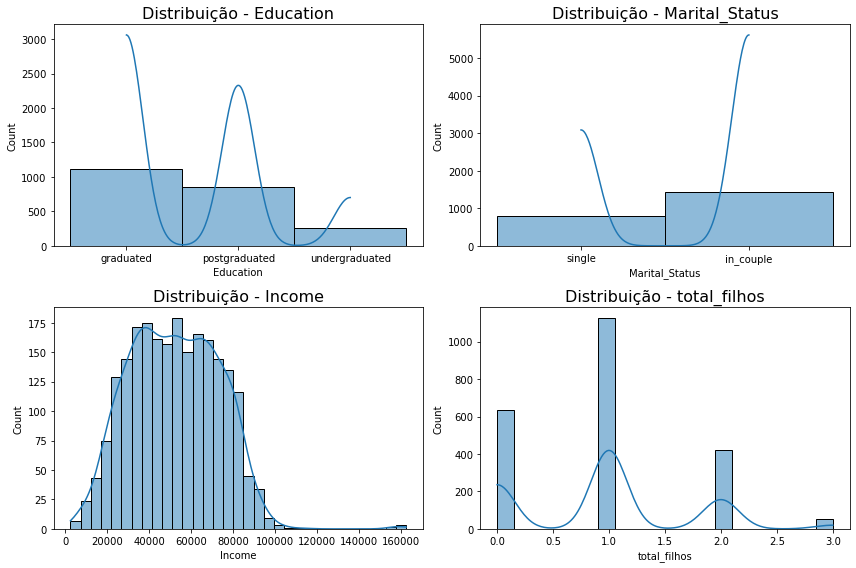

In [23]:
plt.figure(figsize=[12, 8])
for i in inf_pessoais:
    plt.subplot(2, 2, inf_pessoais.index(i) + 1)
    sns.histplot(df[i], kde = True)
    plt.title("Distribuição - " + str(i), fontsize=16)
    plt.tight_layout()
    
plt.show()

1. Apenas 11% dos nossos clientes não são graduados.
2. 64% dos clientes possuem um parceiro.
3. 70% dos clientes possuem pelo menos 1 filho.
4. A média salarial de nossos clientes é de 52k dólares por ano.(Podemos perceber alguns outliers extremos, mais tarde lidares com este problema)

## 2.2 Relacionamento com a Empresa

In [24]:
inf_relacionamento = ["meses_como_cliente", "Recency", "Complain", "total_gasto", "total_compras", "gasto_medio"]

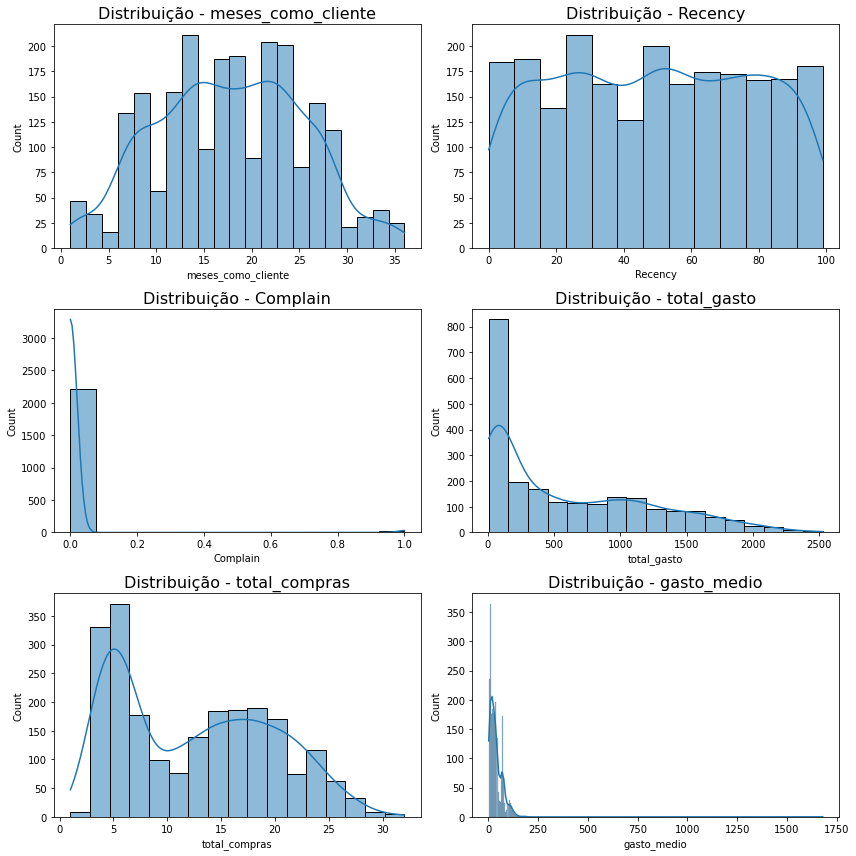

In [25]:
plt.figure(figsize=[12, 12])
for i in inf_relacionamento:
    plt.subplot(3, 2, inf_relacionamento.index(i) + 1)
    sns.histplot(df[i], kde = True)
    plt.title("Distribuição - " + str(i), fontsize=16)
    plt.tight_layout()
    
plt.show()

1. O tempo médio de nossos clientes como clientes é de 18 meses com um desvio de 8.
2. A ultima compra de nossos clientes esta uniformemente distibuida entre 0 e 100 dias, isso significa que a probabilidade de um cliente ter comprado pela ultima vez a 1 dia, ou a 50 dias, ou a 100 dias é semelhante.
3. De todos os 2240 cadastrados em nossa base, apenas 21 deles realizaram algum tipo de reclamação formal.
4. Cerca de 50% de dos nossos clientes gastaram até 400 dólares apenas em seu tempo de vida atual.
5. Em média nossos clientes realizaram um total de 12 compras conosco em seu tempo de vida atual, além disso podemos ver um pico de clientes que realizaram apenas 5 compras.
6. O gasto médio por compra é de 30 dólares.

## 2.3 Hábitos de Consumo

In [26]:
inf_habitos = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
               'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
               'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

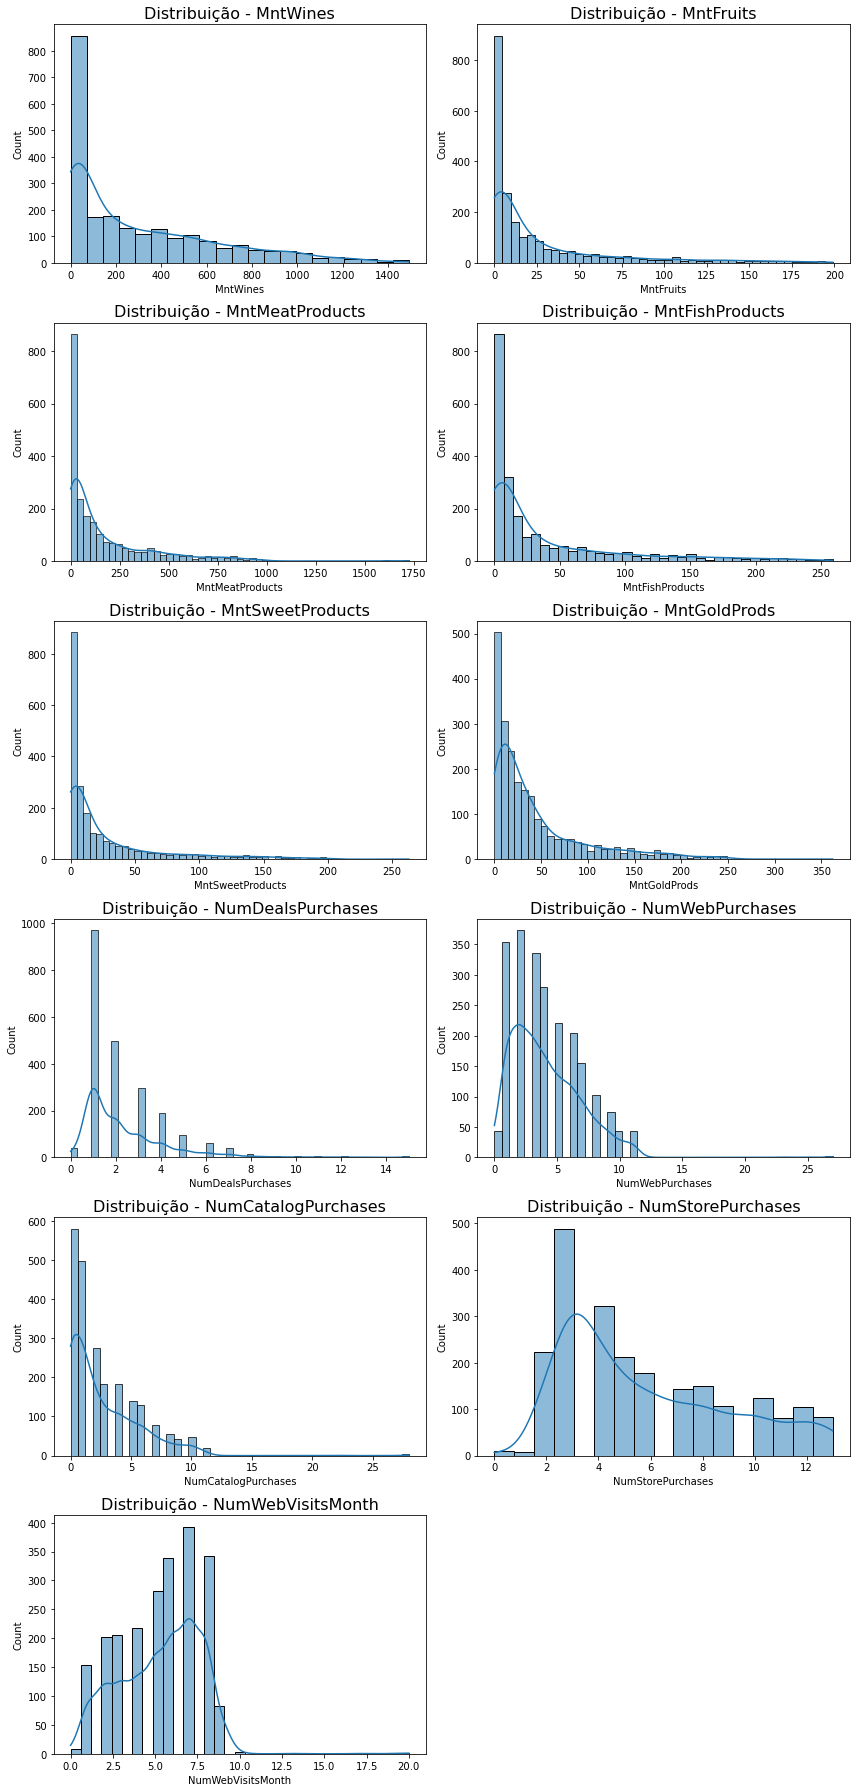

In [27]:
plt.figure(figsize=[12, 25])
for i in inf_habitos:
    plt.subplot(6, 2, inf_habitos.index(i) + 1)
    sns.histplot(df[i], kde = True)
    plt.title("Distribuição - " + str(i), fontsize=16)
    plt.tight_layout()
    
plt.show()

1. Os clientes compram em média mais pela loja fisica, depois pela internet e pouquissimas vezes compram pelo catálogo.
2. Nossos clientes realizaram poucas compras por promoções, apesar de termos alguns outliers com mais de 10 compras por promoção.
3. Dentre os produtos oferecidos, o que mais gera receita são os vinhos.
4. Tivemos em média 5 acessos ao site por cliente no mês passado.

## 2.4 Análise Bivariada

Nesta secção iremos levantar algumas hipóteses a respeito de nossos clientes e iremos testa-las.

### H1: Clientes com elevados graus de instrução ganham mais.

**Verdadeiro:** Essa diferença salarial se aplica apenas entre as pessoa que possuem algum nível de graduação e as que não possuem, mas entre pessoas graduadas e pós-graduadas não temos muita diferença.

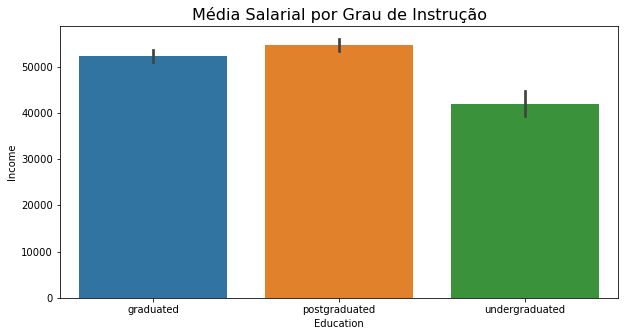

In [28]:
plt.figure(figsize = [10, 5])

sns.barplot(df["Education"], df["Income"])
plt.title("Média Salarial por Grau de Instrução", fontsize = 16);

In [29]:
# Teste ANOVA para verificar se esta relação é estatisticamente significativa

f_oneway(df[df["Education"]=="graduated"].Income.values, df[df["Education"]=="postgraduated"].Income.values, 
         df[df["Education"]=="undergraduated"].Income.values)

F_onewayResult(statistic=37.149319477950634, pvalue=1.3464840243607174e-16)

### H2: Clientes em relacionamentos gastam mais.
**Falso:** Não existe relação entre o estado civil e o total gasto. O teste ANOVA realizado logo após o gráfico nos confirma isto.

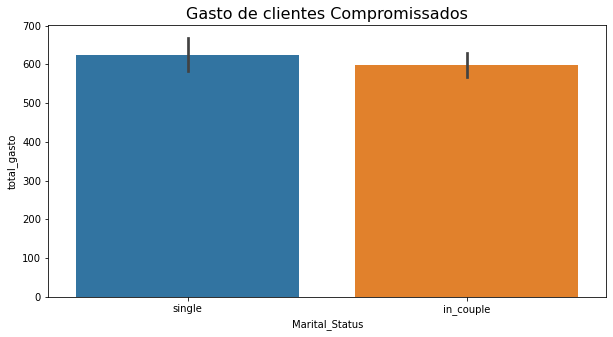

In [30]:
plt.figure(figsize = [10, 5])

sns.barplot(df["Marital_Status"], df["total_gasto"])
plt.title("Gasto de clientes Compromissados", fontsize = 16);

In [31]:
# Teste ANOVA para verificar se esta relação é estatisticamente não significativa

f_oneway(df[df["Marital_Status"]=="single"].Income.values, df[df["Marital_Status"]=="in_couple"].Income.values)

F_onewayResult(statistic=0.08912382265951191, pvalue=0.7653218045486345)

### H3: Clientes que ganham mais gastam mais.
**Verdadeiro:** O total gasto possui uma relação quase exponencial com o salario(excluindo alguns outliers). Com uma correlação de 0.79.

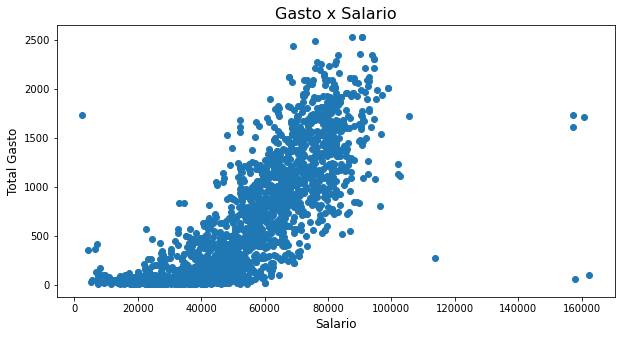

In [32]:
plt.figure(figsize = [10, 5])

plt.scatter(df["Income"], df["total_gasto"])
plt.xlabel("Salario", fontsize=12)
plt.ylabel("Total Gasto", fontsize=12)
plt.title("Gasto x Salario", fontsize = 16);

In [33]:
print("Grau de Correlação:",df[["Income", "total_gasto"]].corr().iloc[1, 0].round(2))

Grau de Correlação: 0.8


### H4: Clientes antigos possuem um gasto médio por compra maior.
**Falso:** Não existe nenhuma relação entre o tempo como cliente e o gasto médio.

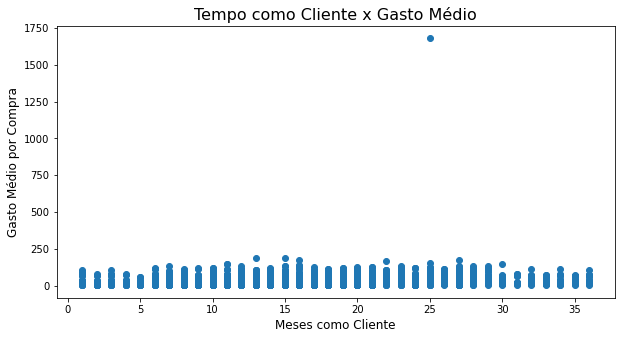

In [34]:
plt.figure(figsize = [10, 5])

plt.scatter(df["meses_como_cliente"], df["gasto_medio"])
plt.xlabel("Meses como Cliente", fontsize=12)
plt.ylabel("Gasto Médio por Compra", fontsize=12)
plt.title("Tempo como Cliente x Gasto Médio", fontsize = 16);

In [35]:
print("Grau de Correlação:",df[["meses_como_cliente", "gasto_medio"]].corr().iloc[1, 0].round(2))

Grau de Correlação: 0.1


### H5: Clientes que possuem filhos gastam mais.
**Falso:** Na realidade é bem o contrário, clientes que não possuem filhos gastam 40% a mais do que clientes sem filho.

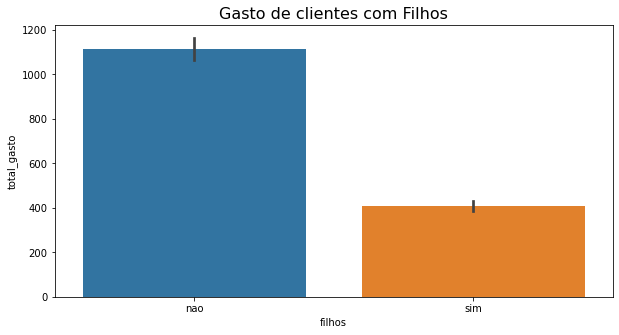

In [36]:
plt.figure(figsize = [10, 5])

sns.barplot(df["filhos"], df["total_gasto"])
plt.title("Gasto de clientes com Filhos", fontsize = 16);

In [37]:
f_oneway(df[df["filhos"]=="sim"].Income.values, df[df["filhos"]=="nao"].Income.values)

F_onewayResult(statistic=435.31600009171956, pvalue=1.8495405882362638e-88)

### H6: Clientes compram mais por promoções costumam comprar menos frequentemente.
**Falso:** Não existe relação significativa entre o numero de compras em promoções e a quantidade de compras.

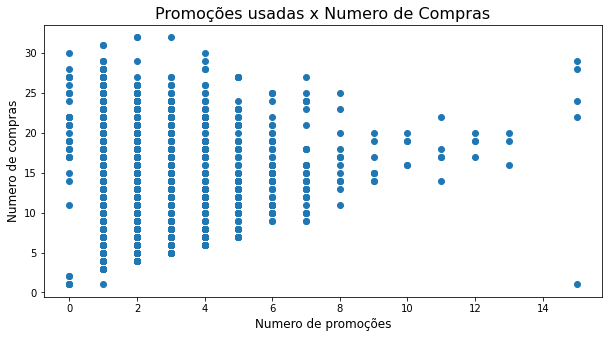

In [38]:
plt.figure(figsize = [10, 5])

plt.scatter(df["NumDealsPurchases"], df["total_compras"])
plt.xlabel("Numero de promoções", fontsize=12)
plt.ylabel("Numero de compras", fontsize=12)
plt.title("Promoções usadas x Numero de Compras", fontsize = 16);

In [39]:
print("Grau de Correlação:",df[["NumDealsPurchases", "total_compras"]].corr().iloc[1, 0].round(2))

Grau de Correlação: 0.13


# 3.0 Segmentação RFM

Para uma primeira segmentação de nossos clientes, foi escolhido o modelo de RFM. Mas do que se trata esse modelo?

RFM é a junção de três siglas: Recência, Frequência e Monetaridade. Essa técnica permitirá entender melhor o cliente ao verificar quando foi sua última compra, quantas vezes ele já comprou e quanto já gastou com a empresa, por exemplo. Assim podemos mapear e classificar os consumidores para fidelizar e recompensar quem já ama a marca e reativar quem está prestes a deixar de usá-la.

Com este modelo de segmentação conseguimos responder a perguntas como:

- Quem são seus melhores clientes?
- Quais clientes têm chance de churn?
- Quem tem potencial para se tornar clientes valiosos?
- Quem são seus clientes fiéis?
- Quem são seus novos clientes?
- Quais clientes são essenciais para reter?
- Qual grupo de clientes tem maior probabilidade de responder à sua campanha atual?
- Quais clientes estão perdidos?

Entre outras perguntas.

## 3.1 Modelagem

Como este não é um modelo de aprendizado de máquina, não precisamos de todos o dados e muito menos precisamos transformar suas distribuições. Somente 5 passos são necessários:

1. Extrair do dataframe principal apenas a recencia, a frequencia e o valor monetario.
2. Separar os valores extraidos em 5 categorias.
3. Com essas categorias iremos gerar uma pontuação para cada cliente.
4. Com esta pontuação iremos separar os clientes por grupos.
5. Identificar as necessidades de cada grupo e gerar a estratégia certa para cada um.

In [40]:
# Extraindo as colunas necessarias em um novo dataframe

df_rfm = df[["ID", "Recency", "total_compras", "total_gasto"]]
df_rfm.columns = ["ID", "recency", "frequency", "monetary"]

In [41]:
# Categorizando os valores

df_rfm["R"] = pd.qcut(df_rfm["recency"], q = 5, labels = [5, 4, 3, 2, 1])
df_rfm["F"] = pd.qcut(df_rfm["frequency"], q = 5, labels = [1, 2, 3, 4, 5])
df_rfm["M"] = pd.qcut(df_rfm["monetary"], q = 5, labels = [1, 2, 3, 4, 5])

**Importante:** Para este problema em questão, se nós analisarmos, veremos que o fator monetary esta altamente correlacionado com o fator frequencia, visto que quanto mais compras um cliente fez mais ele gasta no total.

In [42]:
# Gerando a pontuação

df_rfm['RFM_SCORE'] = (df_rfm['R'].astype('str') + df_rfm['F'].astype('str'))

In [43]:
# Separando em grupos a partir da pontuação

seg_map = {
    r'[1-2][1-2]': 'hibernando', 
    r'[1-2][3-4]': 'em_risco',
    r'[1-2]5': 'n_podem_perder',
    r'3[1-2]': 'prestes_a_dormir',
    r'33': 'precisam_atencao',
    r'[3-4][4-5]': 'fieis',
    r'41': 'promissores',
    r'51': 'novos_consumidores',
    r'[4-5][2-3]': 'potenciais_fieis',
    r'5[4-5]': 'campeoes'
}

df_rfm['segmento'] = df_rfm['RFM_SCORE'].replace(seg_map, regex=True)

## 3.2 Visualizando e Entendendo os Grupos

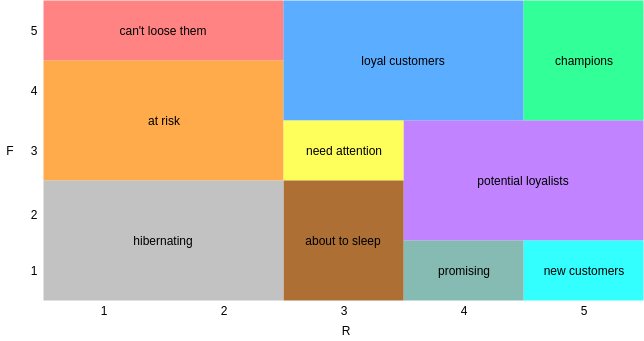


**1. Campeoes:** Este grupo comprou algum produto de nossa empresa recentemente, e se considerarmos todos os outros clientes, eles são nossos principais compradores, significa que seu número de transações é o maior em comparação com nossos outros clientes.


**2. Fieis:** Se algum cliente está incluído neste grupo, isso significa que ele compra algo regularmente. Sua frequência e recência são bastante boas para nós.


**3. Potencial fiel:** Esse tipo de cliente são nossos clientes recentes com frequência média.


**4. Novos clientes:** Compraram algo mais recentemente. Mas sua frequência é realmente pequena. Daqui podemos deduzir que são os nossos novos clientes. Eles acabaram de visitar nosso site. Podemos oferecer-lhes algumas ofertas especiais de 'Bem-vindo'.


**5. Promissores:** Eles são compradores recentes, mas não compraram muito. Sua recência é um pouco maior do que novos clientes.

**6. Precisam de atencao:** A caracteristica deste grupo é que eles estão acima da média de recência e frequência. Nas próximas etapas veremos uma representação visual desses grupos, lá obviamente observaremos que esse grupo está no meio quando todos os clientes são considerados em termos de valores de 'frequência' e 'recência'. Isso significa que, se for dada atenção especial a esse grupo, eles podem estar nos grupos 'Fieis', 'Potencial fiel' ou até 'campeoes', caso contrário, eles podem estar nos grupos 'em risco', 'prestes a dormir' ou 'hibernando'. As decisões de ação que tomaremos podem mover esse grupo para grupos mais valiosos.

**7. Prestes a dormir:** Estão abaixo da recência e frequência médias. Podemos perdê-los se não forem reativados.

**8. Em risco:** Sua frequência está acima da média, mas eles não estão presentes há muito tempo, o que significa que não compraram recentemente. Precisamos trazê-los de volta.

**9. Nao podem se perder:** Eles são nossos principais compradores, considerando todos os outros clientes, mas não visitam nosso site há muito tempo. Não devemos perder esse grupo. Porque o número de transações deles é muito alto. Temos de reconquistá-los, fazer-lhes ofertas especiais e fazê-los sentir-se valiosos. Além disso, podemos realizar uma pesquisa para esse grupo para investigar por que eles não estão presentes por muito tempo, é anormal porque a frequência deles é a maior entre todos os clientes.

**10. Hibernando:** Sua última compra foi há muito tempo e um possuem baixo número de compras. Podemos perdê-los.

In [44]:
df_rfm.head()

,ID,recency,frequency,monetary,R,F,M,RFM_SCORE,segmento
0,5524,58,22,1617,3,5,5,35,fieis
1,2174,38,4,27,4,1,1,41,promissores
2,4141,26,20,776,4,4,4,44,fieis
3,6182,26,6,53,4,2,1,42,potenciais_fieis
4,5324,94,14,422,1,3,3,13,em_risco


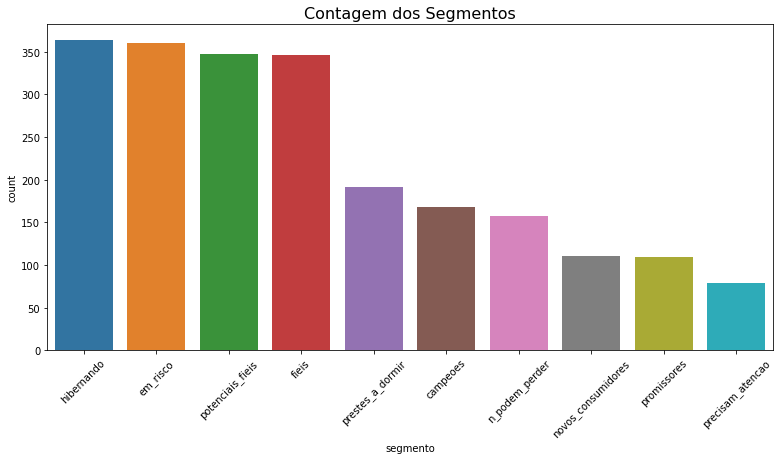

In [45]:
plt.figure(figsize=[13, 6])

sns.countplot(df_rfm["segmento"], order = df_rfm['segmento'].value_counts().index)
plt.title("Contagem dos Segmentos", fontsize=16)
plt.xticks(rotation=45);

In [60]:
for i in df_rfm.segmento.value_counts().values.tolist():
    indice = df_rfm.segmento.value_counts().values.tolist().index(i)
    valor = round((i / df_rfm.shape[0])*100, 2)
    segm = df_rfm.segmento.value_counts().index.tolist()[indice]
    print(str(valor) + "% dos clientes segmentados em " + str(segm))

16.3% dos clientes segmentados em hibernando
16.12% dos clientes segmentados em em_risco
15.54% dos clientes segmentados em potenciais_fieis
15.49% dos clientes segmentados em fieis
8.55% dos clientes segmentados em prestes_a_dormir
7.52% dos clientes segmentados em campeoes
7.03% dos clientes segmentados em n_podem_perder
4.97% dos clientes segmentados em novos_consumidores
4.93% dos clientes segmentados em promissores
3.54% dos clientes segmentados em precisam_atencao


In [61]:
df_rfm.shape

(2233, 9)

In [62]:
round((df_rfm.segmento.value_counts() / df_rfm.shape[0]) * 100, 2)

hibernando            16.30
em_risco              16.12
potenciais_fieis      15.54
fieis                 15.49
prestes_a_dormir       8.55
campeoes               7.52
n_podem_perder         7.03
novos_consumidores     4.97
promissores            4.93
precisam_atencao       3.54
Name: segmento, dtype: float64

## 3.3 Exportando a Tabela de Segmentação

In [46]:
df_final = df_rfm[["ID", "segmento"]]

In [271]:
df_final.to_csv(r"C:\Users\leovi\CursoDS\Pratica\df_rfm.csv", index=False)